In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

In [18]:
df1 = pd.read_csv('data/bcsc_risk_factors_expanded1.csv')
df2 = pd.read_csv('data/bcsc_risk_factors_expanded2.csv')
df3 = pd.read_csv('data/bcsc_risk_factors_expanded3.csv')

In [3]:
df = pd.concat([df1, df2, df3])

In [4]:
df.shape

(6788436, 12)

In [6]:
df.head()

,year,age_group_5_years,race_eth,first_degree_hx,age_menarche,age_first_birth,BIRADS_breast_density,current_hrt,menopaus,bmi_group,biophx,breast_cancer_history
0,2013,7,1,0,9,3,1,1,2,3,0,0
1,2013,7,1,0,9,3,1,1,2,3,0,0
2,2013,7,1,0,9,3,1,1,2,3,0,0
3,2013,7,1,0,9,3,1,1,2,3,0,0
4,2013,7,1,0,9,3,1,1,2,3,0,0


## Drop unknowns

In [11]:
df = df[df.ne(9).all(1)]
df.shape

(1232950, 12)

<Axes: xlabel='breast_cancer_history'>

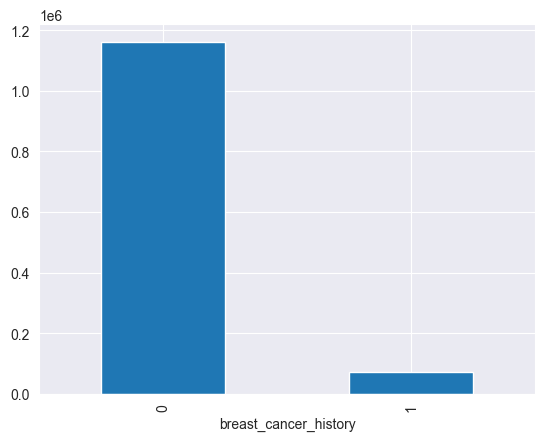

In [14]:
df.breast_cancer_history.value_counts().plot(kind='bar')

## GMM

Text(0.5, 0, 'Number Of Component')

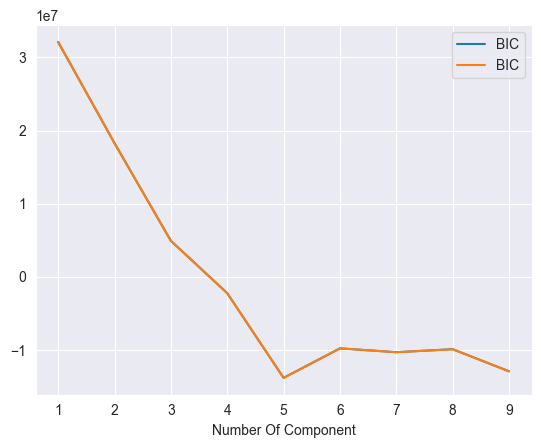

In [15]:
#Prepare
n_component = np.arange(1,10)

#Create GGM Model
models = [GaussianMixture(n_components = n,
                          random_state=42).fit(df) for n in n_component]
#Plot
plt.plot(n_component,
         [m.bic(df) for m in models],
         label = 'BIC')
plt.plot(n_component,
         [m.aic(df) for m in models],
         label = 'AIC')
plt.legend()
plt.xlabel("Number Of Components")

In [16]:
# create GM Models
model = GaussianMixture(n_components=5,
                        random_state=42).fit(df)
cluster = pd.Series(model.predict(df))
df['cluster'] = cluster
df

,year,age_group_5_years,race_eth,first_degree_hx,age_menarche,age_first_birth,BIRADS_breast_density,current_hrt,menopaus,bmi_group,biophx,breast_cancer_history,cluster
15100,2013,7,1,1,0,0,1,0,2,3,0,0,2.0
15101,2013,7,1,1,0,0,1,0,2,3,0,0,2.0
15102,2013,7,1,1,0,0,1,0,2,4,1,0,2.0
15103,2013,7,1,1,0,0,1,0,3,2,1,0,2.0
15104,2013,7,1,1,0,0,1,0,3,4,0,0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2206280,2013,7,1,0,2,4,4,1,2,1,0,0,NaN
2206281,2013,7,1,0,2,4,4,1,2,1,1,0,NaN
2206282,2013,7,1,0,2,4,4,1,2,2,0,0,NaN
2206283,2013,7,1,0,2,4,4,1,2,2,0,0,NaN


In [17]:
df.cluster.value_counts()

cluster
1.0    343667
2.0    178598
0.0     53688
3.0     33594
4.0     16375
Name: count, dtype: int64